# TRSSF Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_trssf = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/trssf.csv')
df_trssf['Date'] = pd.to_datetime(df_trssf['Date'])
df_trssf = df_trssf.set_index('Date')
df_trssf = df_trssf.rename(columns={'Open':'trssf_Open', 'High':'trssf_High', 'Low':'trssf_Low', 'Close':'trssf_Close', 'Volume':'trssf_Volume'})
df_trssf = df_trssf.drop('Adj Close', axis=1)
df_trssf['trssf_prev_close'] = df_trssf['trssf_Close'].shift(1)
df_trssf['trssf_next_close'] = df_trssf['trssf_Close'].shift(-1)
df_trssf['trssf_diff'] = df_trssf['trssf_Close'].diff()
df_trssf['trssf_%change'] = df_trssf['trssf_Close'].pct_change()
df_trssf['trssf_5day_avg_close'] = df_trssf['trssf_Close'].rolling(5).mean()
df_trssf['trssf_5day_avg_diff'] = df_trssf['trssf_diff'].rolling(5).mean()
df_trssf['trssf_10day_avg_close'] = df_trssf['trssf_Close'].rolling(10).mean()
df_trssf['trssf_10day_avg_diff'] = df_trssf['trssf_diff'].rolling(10).mean()

In [4]:
df_trssf

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-03       4.630       4.640      4.240        4.290        177000   
2022-05-04       4.280       4.280      4.020        4.170        396700   
2022-05-05       4.010       4.150      3.750        3.780        530800   
2022-05-06       3.775       4.100      3.420        4.090        408800   
2022-05-09       3.950       4.000      3.750        3.890        212900   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17               NaN             1.478         NaN            NaN   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-03             4.630             4.170      -0.340      -0.073434   
2022-05-04             4.290             3.780      -0.120      -0.027972   
2022-05-05             4.170             4.090      -0.390      -0.093525   
2022-05-06             3.780             3.890       0.310       0.082011   
2022-05-09             4.090               NaN      -0.200      -0.048900   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                   NaN                  NaN                    NaN   
2017-11-20                   NaN                  NaN                    NaN   
2017-11-21                   NaN                  NaN                    NaN   
2017-11-22                   NaN                  NaN                    NaN   
2017-11-24                1.4506                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                4.7370               -0.212                 5.0949   
2022-05-04                4.5590               -0.178                 4.9719   
2022-05-05                4.3050               -0.254                 4.8019   
2022-05-06                4.1920               -0.113                 4.6579   
2022-05-09                4.0440               -0.148                 4.4965   

            trssf_10day_avg_diff  
Date                              
2017-11-17                   NaN  
2017-11-20                   NaN  
2017-11-21                   NaN  
2017-11-22                   NaN  
2017-11-24                   NaN  
...                          ...  
2022-05-03               -0.1260  
2022-05-04               -0.1230  
2022-05-05               -0.1700  
2022-05-06               -0.1440  
2022-05-09               -0.1614  

[1125 rows x 13 columns]

In [5]:
cut = df_trssf.index.min()
cut

Timestamp('2017-11-17 00:00:00')

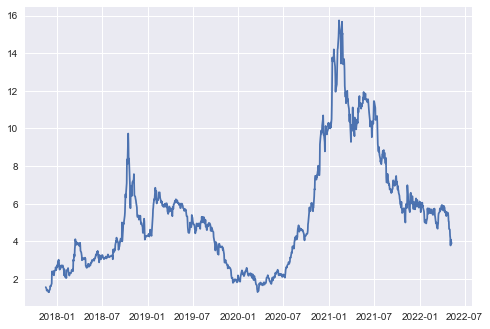

In [6]:
plt.plot(df_trssf['trssf_Close'])

## TRSSF and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-04   33171.80   34117.74  33021.84    34061.06  479098068.0   
2022-05-05   33854.17   33854.17  32685.10    32997.97  507031169.0   
2022-05-06   32773.88   33055.84  32474.69    32899.37  457941820.0   
2022-05-09   32685.17   32685.17  32121.98    32245.70  535207901.0   
2022-05-10   32504.09   32752.17  31887.89    32160.74  493104054.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-04         33128.79         32997.97     932.27      0.028141   
2022-05-05         34061.06         32899.37   -1063.09     -0.031211   
2022-05-06         32997.97         32245.70     -98.60     -0.002988   
2022-05-09         32899.37         32160.74    -653.67     -0.019869   
2022-05-10         32245.70              NaN     -84.96     -0.002635   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-04            33428.990             151.826             33634.068   
2022-05-05            33245.306            -183.684             33454.589   
2022-05-06            33229.738             -15.568             33363.386   
2022-05-09            33066.578            -163.160             33183.010   
2022-05-10            32872.968            -193.610             33075.066   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-04             -109.973  
2022-05-05             -179.479  
2022-05-06              -91.203  
2022-05-09             -180.376  
2022-05-10             -107.944  

[32631 rows x 13 columns]

In [8]:
df0 = pd.merge(df_trssf, df_dow, on='Date', how='left')
df0

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-03       4.630       4.640      4.240        4.290        177000   
2022-05-04       4.280       4.280      4.020        4.170        396700   
2022-05-05       4.010       4.150      3.750        3.780        530800   
2022-05-06       3.775       4.100      3.420        4.090        408800   
2022-05-09       3.950       4.000      3.750        3.890        212900   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17               NaN             1.478         NaN            NaN   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-03             4.630             4.170      -0.340      -0.073434   
2022-05-04             4.290             3.780      -0.120      -0.027972   
2022-05-05             4.170             4.090      -0.390      -0.093525   
2022-05-06             3.780             3.890       0.310       0.082011   
2022-05-09             4.090               NaN      -0.200      -0.048900   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                   NaN                  NaN                    NaN   
2017-11-20                   NaN                  NaN                    NaN   
2017-11-21                   NaN                  NaN                    NaN   
2017-11-22                   NaN                  NaN                    NaN   
2017-11-24                1.4506                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                4.7370               -0.212                 5.0949   
2022-05-04                4.5590               -0.178                 4.9719   
2022-05-05                4.3050               -0.254                 4.8019   
2022-05-06                4.1920               -0.113                 4.6579   
2022-05-09                4.0440               -0.148                 4.4965   

            trssf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2017-11-17                   NaN   23433.77   23433.77  23356.01    23358.24   
2017-11-20                   NaN   23370.71   23456.88  23360.58    23430.33   
2017-11-21                   NaN   23500.15   23617.80  23500.15    23590.83   
2017-11-22                   NaN   23597.24   23605.77  23507.61    23526.18   
2017-11-24                   NaN   23552.75   23599.18  23551.59    23557.99   
...                          ...        ...        ...       ...         ...   
2022-05-03               -0.1260   33086.09   33341.58  32914.75    33128.79   
2022-05-04               -0.1230   33171.80   34117.74  33021.84    34061.06   
2022-05-05               -0.1700   33854.17   33854.17  32685.10    32997.97   
2022-05-06               -0.1440   32773.88   33055.84  32474.69    32899.37   
2022-05-09          

In [9]:
df_isna0 = df0.isna()
df_isna0

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       False       False      False        False         False   
2017-11-20       False       False      False        False         False   
2017-11-21       False       False      False        False         False   
2017-11-22       False       False      False        False         False   
2017-11-24       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17              True             False        True           True   
2017-11-20             False             False       False          False   
2017-11-21             False             False       False          False   
2017-11-22             False             False       False          False   
2017-11-24             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                  True                 True                   True   
2017-11-20                  True                 True                   True   
2017-11-21                  True                 True                   True   
2017-11-22                  True                 True                   True   
2017-11-24                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            trssf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2017-11-17                  True      False      False     False       False   
2017-11-20                  True      False      False     False       False   
2017-11-21                  True      False      False     False       False   
2017-11-22                  True      False      False     False       False   
2017-11-24                  True      False      False     False       False   
...                          ...        ...        ...       ...         ...   
2022-05-03                 False      False      False     False       False   
2022-05-04                 False      False      False     False       False   
2022-05-05                 False      False      False     False       False   
2022-05-06                 False      False      False     False       False   
2022-05-09          

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17             0.000             1.478       0.000       0.000000   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                0.0000                  0.0                    0.0   
2017-11-20                0.0000                  0.0                    0.0   
2017-11-21                0.0000                  0.0                    0.0   
2017-11-22                0.0000                  0.0                    0.0   
2017-11-24                1.4506                  0.0                    0.0   

            trssf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2017-11-17                   0.0   23433.77   23433.77  23356.01    23358.24   
2017-11-20                   0.0   23370.71   23456.88  23360.58    23430.33   
2017-11-21                   0.0   23500.15   23617.80  23500.15    23590.83   
2017-11-22                   0.0   23597.24   23605.77  23507.61    23526.18   
2017-11-24                   0.0   23552.75   23599.18  23551.59    23557.99   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2017-11-17  385970664.0         23458.36         23430.33    -100.12   
2017-11-20  315237090.0         23358.24         23590.83      72.09   
2017-11-21  329720122.0         23430.33         23526.18     160.50   
2017-11-22  268703079.0         23590.83         23557.99     -64.65   
2017-11-24  118640439.0         23526.18         23580.78      31.81   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2017-11-17     -0.004268            23387.410             -12.794   
2017-11-20      0.003086            23385.536              -1.874   
2017-11-21      0.006850            23421.808              36.272   
2017-11-22     -0.002740            23472.788              50.980   
2017-11-24      0.001352            23492.714              19.926   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2017-11-17             23449.021              -18.095  
2017-11-20             23437.212              -11.809  
2017-11-21             23440.572                3.360  
2017-11-22             23436.854               -3.718  
2017-11-24             23446.459                9.605

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-03       4.630       4.640      4.240        4.290        177000   
2022-05-04       4.280       4.280      4.020        4.170        396700   
2022-05-05       4.010       4.150      3.750        3.780        530800   
2022-05-06       3.775       4.100      3.420        4.090        408800   
2022-05-09       3.950       4.000      3.750        3.890        212900   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17             0.000             1.478       0.000       0.000000   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-03             4.630             4.170      -0.340      -0.073434   
2022-05-04             4.290             3.780      -0.120      -0.027972   
2022-05-05             4.170             4.090      -0.390      -0.093525   
2022-05-06             3.780             3.890       0.310       0.082011   
2022-05-09             4.090             0.000      -0.200      -0.048900   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                0.0000                0.000                 0.0000   
2017-11-20                0.0000                0.000                 0.0000   
2017-11-21                0.0000                0.000                 0.0000   
2017-11-22                0.0000                0.000                 0.0000   
2017-11-24                1.4506                0.000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03                4.7370               -0.212                 5.0949   
2022-05-04                4.5590               -0.178                 4.9719   
2022-05-05                4.3050               -0.254                 4.8019   
2022-05-06                4.1920               -0.113                 4.6579   
2022-05-09                4.0440               -0.148                 4.4965   

            trssf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2017-11-17                0.0000   23433.77   23433.77  23356.01    23358.24   
2017-11-20                0.0000   23370.71   23456.88  23360.58    23430.33   
2017-11-21                0.0000   23500.15   23617.80  23500.15    23590.83   
2017-11-22                0.0000   23597.24   23605.77  23507.61    23526.18   
2017-11-24                0.0000   23552.75   23599.18  23551.59    23557.99   
...                          ...        ...        ...       ...         ...   
2022-05-03               -0.1260   33086.09   33341.58  32914.75    33128.79   
2022-05-04               -0.1230   33171.80   34117.74  33021.84    34061.06   
2022-05-05               -0.1700   33854.17   33854.17  32685.10    32997.97   
2022-05-06               -0.1440   32773.88   33055.84  32474.69    32899.37   
2022-05-09          

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'trssf_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2017-11-17     11   17  2017        4       1.592       1.592      1.495   
2017-11-20     11   20  2017        4       1.562       1.562      1.396   
2017-11-21     11   21  2017        4       1.451       1.478      1.379   
2017-11-22     11   22  2017        4       1.350       1.430      1.338   
2017-11-24     11   24  2017        4       1.460       1.460      1.421   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_next_close  \
Date                                                                        
2017-11-17        1.565         91400             0.000             1.478   
2017-11-20        1.478        287000             1.565             1.379   
2017-11-21        1.379        230900             1.478             1.410   
2017-11-22        1.410        211800             1.379             1.421   
2017-11-24        1.421         26000             1.410             1.342   

            trssf_diff  trssf_%change  trssf_5day_avg_close  \
Date                                                          
2017-11-17       0.000       0.000000                0.0000   
2017-11-20      -0.087      -0.055591                0.0000   
2017-11-21      -0.099      -0.066982                0.0000   
2017-11-22       0.031       0.022480                0.0000   
2017-11-24       0.011       0.007801                1.4506   

            trssf_5day_avg_diff  trssf_10day_avg_close  trssf_10day_avg_diff  \
Date                                                                           
2017-11-17                  0.0                    0.0                   0.0   
2017-11-20                  0.0                    0.0                   0.0   
2017-11-21                  0.0                    0.0                   0.0   
2017-11-22                  0.0                    0.0                   0.0   
2017-11-24                  0.0                    0.0                   0.0   

            djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
2017-11-17   23433.77   23433.77  23356.01    23358.24  385970664.0   
2017-11-20   23370.71   23456.88  23360.58    23430.33  315237090.0   
2017-11-21   23500.15   23617.80  23500.15    23590.83  329720122.0   
2017-11-22   23597.24   23605.77  23507.61    23526.18  268703079.0   
2017-11-24   23552.75   23599.18  23551.59    23557.99  118640439.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
2017-11-17         23458.36         23430.33    -100.12     -0.004268   
2017-11-20         23358.24         23590.83      72.09      0.003086   
2017-11-21         23430.33         23526.18     160.50      0.006850   
2017-11-22         23590.83         23557.99     -64.65     -0.002740   
2017-11-24         23526.18         23580.78      31.81      0.001352   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
2017-11-17            23387.410             -12.794             23449.021   
2017-11-20            23385.536              -1.874             23437.212   
2017-11-21            23421.808              36.272             23440.572   
2017-11-22            23472.788              50.980             23436.854   
2017-11-24            23492.714              19.926             23446.459   

            djix_10day_avg_diff  trssf_Open_b  trssf_High_b  trssf_Low_b  \
Date                                                                       
2017-11-17              -18.095         False         False        False   
2017-11-20              -11.809         False         False        False   
2017-11-21                3.360         False         False        False   
2017-1

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(1124, 56)

In [18]:
n = int(len(df0) * 0.9)
n

1011

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

1011
113


In [21]:
X_train0 = train0.drop('trssf_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2017-11-17     11   17  2017        4       1.592       1.592      1.495   
2017-11-20     11   20  2017        4       1.562       1.562      1.396   
2017-11-21     11   21  2017        4       1.451       1.478      1.379   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_diff  \
Date                                                                  
2017-11-17        1.565         91400             0.000       0.000   
2017-11-20        1.478        287000             1.565      -0.087   
2017-11-21        1.379        230900             1.478      -0.099   

            trssf_%change  trssf_5day_avg_close  trssf_5day_avg_diff  \
Date                                                                   
2017-11-17       0.000000                   0.0                  0.0   
2017-11-20      -0.055591                   0.0                  0.0   
2017-11-21      -0.066982                   0.0                  0.0   

            trssf_10day_avg_close  trssf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2017-11-17                    0.0                   0.0   23433.77   23433.77   
2017-11-20                    0.0                   0.0   23370.71   23456.88   
2017-11-21                    0.0                   0.0   23500.15   23617.80   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2017-11-17  23356.01    23358.24  385970664.0         23458.36   
2017-11-20  23360.58    23430.33  315237090.0         23358.24   
2017-11-21  23500.15    23590.83  329720122.0         23430.33   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2017-11-17         23430.33    -100.12     -0.004268            23387.410   
2017-11-20         23590.83      72.09      0.003086            23385.536   
2017-11-21         23526.18     160.50      0.006850            23421.808   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2017-11-17             -12.794             23449.021              -18.095   
2017-11-20              -1.874             23437.212              -11.809   
2017-11-21              36.272             23440.572                3.360   

            trssf_Open_b  trssf_High_b  trssf_Low_b  trssf_Close_b  \
Date                                                                 
2017-11-17         False         False        False          False   
2017-11-20         False         False        False          False   
2017-11-21         False         False        False          False   

            trssf_Volume_b  trssf_prev_close_b  trssf_next_close_b  \
Date                                                                 
2017-11-17           False                True               False   
2017-11-20           False               False               False   
2017-11-21           False               False               False   

            trssf_diff_b  trssf_%change_b  trssf_5day_avg_close_b  \
Date                                                                
2017-11-17          True             True                    True   
2017-11-20         False            False                    True   
2017-11-21         False            False                    True   

            trssf_5day_avg_diff_b  trssf_10day_avg_close_b  \
Date                                                         
2017-11-17                   True                     True   
2017-11-20                   True                     True   
2017-11-21                   True                     True   

            trssf_10day_avg_diff_b  djix_Open_

In [22]:
X_train0.shape

(1011, 55)

In [23]:
y_train0 = train0['trssf_next_close']
y_train0.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-11-19    5.550
2021-11-22    6.055
2021-11-23    6.510
Name: trssf_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('trssf_next_close', axis=1)
y_test0 = test0['trssf_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2021-11-24     11   24  2021        4        6.05       6.630       5.84   
2021-11-26     11   26  2021        4        6.05       6.700       6.05   
2021-11-29     11   29  2021        4        6.26       6.618       6.15   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_diff  \
Date                                                                  
2021-11-24         6.51        440700             6.055       0.455   
2021-11-26         6.58        123400             6.510       0.070   
2021-11-29         6.16        210300             6.580      -0.420   

            trssf_%change  trssf_5day_avg_close  trssf_5day_avg_diff  \
Date                                                                   
2021-11-24       0.075145                 5.987                0.082   
2021-11-26       0.010753                 6.085                0.098   
2021-11-29      -0.063830                 6.171                0.086   

            trssf_10day_avg_close  trssf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2021-11-24                 6.1333                0.0740   35752.31   35825.47   
2021-11-26                 6.1935                0.0602   35366.69   35366.69   
2021-11-29                 6.1115               -0.0820   35017.71   35287.91   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2021-11-24  35591.03    35804.38  316649299.0         35813.80   
2021-11-26  34749.80    34899.34  422038092.0         35804.38   
2021-11-29  34895.89    35135.94  502302043.0         34899.34   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2021-11-24         34899.34      -9.42     -0.000263            35742.072   
2021-11-26         35135.94    -905.04     -0.025277            35547.750   
2021-11-29         34483.72     236.60      0.006779            35454.542   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2021-11-24             -25.334             35889.262              -27.556   
2021-11-26            -194.322             35787.073             -102.189   
2021-11-29             -93.208             35690.636              -96.437   

            trssf_Open_b  trssf_High_b  trssf_Low_b  trssf_Close_b  \
Date                                                                 
2021-11-24         False         False        False          False   
2021-11-26         False         False        False          False   
2021-11-29         False         False        False          False   

            trssf_Volume_b  trssf_prev_close_b  trssf_next_close_b  \
Date                                                                 
2021-11-24           False               False               False   
2021-11-26           False               False               False   
2021-11-29           False               False               False   

            trssf_diff_b  trssf_%change_b  trssf_5day_avg_close_b  \
Date                                                                
2021-11-24         False            False                   False   
2021-11-26         False            False                   False   
2021-11-29         False            False                   False   

            trssf_5day_avg_diff_b  trssf_10day_avg_close_b  \
Date                                                         
2021-11-24                  False                    False   
2021-11-26                  False                    False   
2021-11-29                  False                    False   

            trssf_10day_avg_diff_b  djix_Open_

In [27]:
X_test0.shape

(113, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-04    3.78
2022-05-05    4.09
2022-05-06    3.89
Name: trssf_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([6.42128923, 6.55897902, 6.20368656, 5.88026053, 5.99961705])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.2030915189927409


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.16077569828535673


In [34]:
hyper_table.append(dict(version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

In [35]:
y_train0 = pd.DataFrame(y_train0, columns=['trssf_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['trssf_next_close'])

In [36]:
y_test0['trssf_pred_next_close'] = y_pred0

In [37]:
y_test0.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-02              4.29               4.673203
2022-05-03              4.17               4.329678
2022-05-04              3.78               4.068519
2022-05-05              4.09               3.833304
2022-05-06              3.89               3.948483

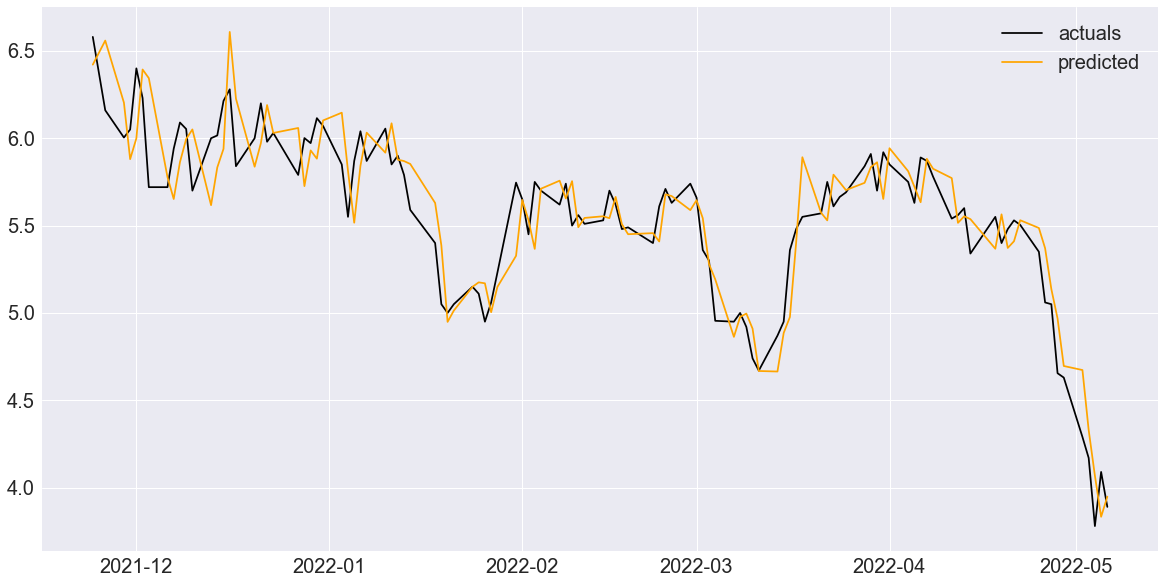

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['trssf_next_close'], color='black')
ax.plot(y_test0['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## TRSSF and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_trssf, df_etfs, on='Date', how='left')
df1

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-03       4.630       4.640      4.240        4.290        177000   
2022-05-04       4.280       4.280      4.020        4.170        396700   
2022-05-05       4.010       4.150      3.750        3.780        530800   
2022-05-06       3.775       4.100      3.420        4.090        408800   
2022-05-09       3.950       4.000      3.750        3.890        212900   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17               NaN             1.478         NaN            NaN   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-03             4.630             4.170      -0.340      -0.073434   
2022-05-04             4.290             3.780      -0.120      -0.027972   
2022-05-05             4.170             4.090      -0.390      -0.093525   
2022-05-06             3.780             3.890       0.310       0.082011   
2022-05-09             4.090               NaN      -0.200      -0.048900   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                   NaN                  NaN                    NaN   
2017-11-20                   NaN                  NaN                    NaN   
2017-11-21                   NaN                  NaN                    NaN   
2017-11-22                   NaN                  NaN                    NaN   
2017-11-24                1.4506                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                4.7370               -0.212                 5.0949   
2022-05-04                4.5590               -0.178                 4.9719   
2022-05-05                4.3050               -0.254                 4.8019   
2022-05-06                4.1920               -0.113                 4.6579   
2022-05-09                4.0440               -0.148                 4.4965   

            trssf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2017-11-17                   NaN  29.889999  29.889999  29.629999  29.761000   
2017-11-20                   NaN  29.980000  29.980000  29.532000  29.600000   
2017-11-21                   NaN  29.500000  29.701000  29.440001  29.540001   
2017-11-22                   NaN  29.639999  29.639999  29.226000  29.549000   
2017-11-24                   NaN  29.879999  29.879999  29.650000  29.732000   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.1260   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.1230   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.1700   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.1440   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [41]:
df_isna1 = df1.isna()
df_isna1

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       False       False      False        False         False   
2017-11-20       False       False      False        False         False   
2017-11-21       False       False      False        False         False   
2017-11-22       False       False      False        False         False   
2017-11-24       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17              True             False        True           True   
2017-11-20             False             False       False          False   
2017-11-21             False             False       False          False   
2017-11-22             False             False       False          False   
2017-11-24             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                  True                 True                   True   
2017-11-20                  True                 True                   True   
2017-11-21                  True                 True                   True   
2017-11-22                  True                 True                   True   
2017-11-24                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            trssf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2017-11-17                  True    False    False   False     False   
2017-11-20                  True    False    False   False     False   
2017-11-21                  True    False    False   False     False   
2017-11-22                  True    False    False   False     False   
2017-11-24                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-03                 False    False    False   False     False   
2022-05-04                 False    False    False   False     False   
2022-05-05                 False    False    False   False     False   
2022-05-06                 False    False    False   False     False   
2022-05-09                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17             0.000             1.478       0.000       0.000000   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                0.0000                  0.0                    0.0   
2017-11-20                0.0000                  0.0                    0.0   
2017-11-21                0.0000                  0.0                    0.0   
2017-11-22                0.0000                  0.0                    0.0   
2017-11-24                1.4506                  0.0                    0.0   

            trssf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2017-11-17                   0.0  29.889999  29.889999  29.629999  29.761000   
2017-11-20                   0.0  29.980000  29.980000  29.532000  29.600000   
2017-11-21                   0.0  29.500000  29.701000  29.440001  29.540001   
2017-11-22                   0.0  29.639999  29.639999  29.226000  29.549000   
2017-11-24                   0.0  29.879999  29.879999  29.650000  29.732000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2017-11-17       5000      29.430000      29.600000  0.331000    0.011247   
2017-11-20       8400      29.761000      29.540001 -0.161000   -0.005410   
2017-11-21       5300      29.600000      29.549000 -0.059999   -0.002027   
2017-11-22       5000      29.540001      29.732000  0.008999    0.000305   
2017-11-24       4600      29.549000      29.730000  0.183000    0.006193   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2017-11-17            29.3630            0.0022             29.7103   
2017-11-20            29.3838            0.0208             29.6483   
2017-11-21            29.4618            0.0780             29.5925   
2017-11-22            29.5760            0.1142             29.5274   
2017-11-24            29.6364            0.0604             29.4986   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2017-11-17            -0.0459        0.0        0.0       0.0         0.0   
2017-11-20            -0.0620        0.0        0.0       0.0         0.0   
2017-11-21            -0.0558        0.0        0.0       0.0         0.0   
2017-11-22            -0.0651        0.0        0.0       0.0         0.0   
2017-11-24            -0.0288        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2017-11-17          0.0              0.0              0.0        0.0   
2017-11-20          0.0

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-03       4.630       4.640      4.240        4.290        177000   
2022-05-04       4.280       4.280      4.020        4.170        396700   
2022-05-05       4.010       4.150      3.750        3.780        530800   
2022-05-06       3.775       4.100      3.420        4.090        408800   
2022-05-09       3.950       4.000      3.750        3.890        212900   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17             0.000             1.478       0.000       0.000000   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-03             4.630             4.170      -0.340      -0.073434   
2022-05-04             4.290             3.780      -0.120      -0.027972   
2022-05-05             4.170             4.090      -0.390      -0.093525   
2022-05-06             3.780             3.890       0.310       0.082011   
2022-05-09             4.090             0.000      -0.200      -0.048900   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                0.0000                0.000                 0.0000   
2017-11-20                0.0000                0.000                 0.0000   
2017-11-21                0.0000                0.000                 0.0000   
2017-11-22                0.0000                0.000                 0.0000   
2017-11-24                1.4506                0.000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03                4.7370               -0.212                 5.0949   
2022-05-04                4.5590               -0.178                 4.9719   
2022-05-05                4.3050               -0.254                 4.8019   
2022-05-06                4.1920               -0.113                 4.6579   
2022-05-09                4.0440               -0.148                 4.4965   

            trssf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2017-11-17                0.0000  29.889999  29.889999  29.629999  29.761000   
2017-11-20                0.0000  29.980000  29.980000  29.532000  29.600000   
2017-11-21                0.0000  29.500000  29.701000  29.440001  29.540001   
2017-11-22                0.0000  29.639999  29.639999  29.226000  29.549000   
2017-11-24                0.0000  29.879999  29.879999  29.650000  29.732000   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.1260   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.1230   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.1700   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.1440   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'trssf_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2017-11-17     11   17  2017        4       1.592       1.592      1.495   
2017-11-20     11   20  2017        4       1.562       1.562      1.396   
2017-11-21     11   21  2017        4       1.451       1.478      1.379   
2017-11-22     11   22  2017        4       1.350       1.430      1.338   
2017-11-24     11   24  2017        4       1.460       1.460      1.421   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-03      5    3  2022        2       4.630       4.640      4.240   
2022-05-04      5    4  2022        2       4.280       4.280      4.020   
2022-05-05      5    5  2022        2       4.010       4.150      3.750   
2022-05-06      5    6  2022        2       3.775       4.100      3.420   
2022-05-09      5    9  2022        2       3.950       4.000      3.750   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_next_close  \
Date                                                                        
2017-11-17        1.565         91400             0.000             1.478   
2017-11-20        1.478        287000             1.565             1.379   
2017-11-21        1.379        230900             1.478             1.410   
2017-11-22        1.410        211800             1.379             1.421   
2017-11-24        1.421         26000             1.410             1.342   
...                 ...           ...               ...               ...   
2022-05-03        4.290        177000             4.630             4.170   
2022-05-04        4.170        396700             4.290             3.780   
2022-05-05        3.780        530800             4.170             4.090   
2022-05-06        4.090        408800             3.780             3.890   
2022-05-09        3.890        212900             4.090             0.000   

            trssf_diff  trssf_%change  trssf_5day_avg_close  \
Date                                                          
2017-11-17       0.000       0.000000                0.0000   
2017-11-20      -0.087      -0.055591                0.0000   
2017-11-21      -0.099      -0.066982                0.0000   
2017-11-22       0.031       0.022480                0.0000   
2017-11-24       0.011       0.007801                1.4506   
...                ...            ...                   ...   
2022-05-03      -0.340      -0.073434                4.7370   
2022-05-04      -0.120      -0.027972                4.5590   
2022-05-05      -0.390      -0.093525                4.3050   
2022-05-06       0.310       0.082011                4.1920   
2022-05-09      -0.200      -0.048900                4.0440   

            trssf_5day_avg_diff  trssf_10day_avg_close  trssf_10day_avg_diff  \
Date                                                                           
2017-11-17                0.000                 0.0000                0.0000   
2017-11-20                0.000                 0.0000                0.0000   
2017-11-21                0.000                 0.0000                0.0000   
2017-11-22                0.000                 0.0000                0.0000   
2017-11-24                0.000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-03               -0.212                 5.0949               -0.1260   
2022-05-04               -0.178                 4.9719               -0.1230   
2022-05-05               -0.254                 4.8019               -0.1700   
2022-05-06               -0.113                 4.6579               -0.1440   
2022-05-09               -0.148                 4.4965               -0.1614   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2017-11-17  29.889999 

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

1011

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

1011
113


In [52]:
X_train1 = train1.drop('trssf_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2017-11-17     11   17  2017        4       1.592       1.592      1.495   
2017-11-20     11   20  2017        4       1.562       1.562      1.396   
2017-11-21     11   21  2017        4       1.451       1.478      1.379   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_diff  \
Date                                                                  
2017-11-17        1.565         91400             0.000       0.000   
2017-11-20        1.478        287000             1.565      -0.087   
2017-11-21        1.379        230900             1.478      -0.099   

            trssf_%change  trssf_5day_avg_close  trssf_5day_avg_diff  \
Date                                                                   
2017-11-17       0.000000                   0.0                  0.0   
2017-11-20      -0.055591                   0.0                  0.0   
2017-11-21      -0.066982                   0.0                  0.0   

            trssf_10day_avg_close  trssf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2017-11-17                    0.0                   0.0  29.889999  29.889999   
2017-11-20                    0.0                   0.0  29.980000  29.980000   
2017-11-21                    0.0                   0.0  29.500000  29.701000   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2017-11-17  29.629999  29.761000       5000         29.430      29.600000   
2017-11-20  29.532000  29.600000       8400         29.761      29.540001   
2017-11-21  29.440001  29.540001       5300         29.600      29.549000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2017-11-17  0.331000    0.011247            29.3630            0.0022   
2017-11-20 -0.161000   -0.005410            29.3838            0.0208   
2017-11-21 -0.059999   -0.002027            29.4618            0.0780   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2017-11-17             29.7103            -0.0459        0.0        0.0   
2017-11-20             29.6483            -0.0620        0.0        0.0   
2017-11-21             29.5925            -0.0558        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2017-11-17       0.0         0.0          0.0              0.0   
2017-11-20       0.0         0.0          0.0              0.0   
2017-11-21       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2017-11-17              0.0        0.0           0.0                  0.0   
2017-11-20              0.0        0.0           0.0                  0.0   
2017-11-21              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2017-11-17                 0.0                   0.0                  0.0   
2017-11-20                 0.0                   0.0                  0.0   
2017-11-21                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2017-11-17        0.0        0.0       0.0         0.0          0.0   
2017-11-20        0.0        0.0       0.0         0.0          

In [53]:
X_train1.shape

(1011, 159)

In [54]:
y_train1 = train1['trssf_next_close']
y_train1.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-11-19    5.550
2021-11-22    6.055
2021-11-23    6.510
Name: trssf_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('trssf_next_close', axis=1)
y_test1 = test1['trssf_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2021-11-24     11   24  2021        4        6.05       6.630       5.84   
2021-11-26     11   26  2021        4        6.05       6.700       6.05   
2021-11-29     11   29  2021        4        6.26       6.618       6.15   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_diff  \
Date                                                                  
2021-11-24         6.51        440700             6.055       0.455   
2021-11-26         6.58        123400             6.510       0.070   
2021-11-29         6.16        210300             6.580      -0.420   

            trssf_%change  trssf_5day_avg_close  trssf_5day_avg_diff  \
Date                                                                   
2021-11-24       0.075145                 5.987                0.082   
2021-11-26       0.010753                 6.085                0.098   
2021-11-29      -0.063830                 6.171                0.086   

            trssf_10day_avg_close  trssf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2021-11-24                 6.1333                0.0740    12.73    13.08   
2021-11-26                 6.1935                0.0602    12.57    12.73   
2021-11-29                 6.1115               -0.0820    12.74    12.74   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2021-11-24   12.59     13.01     756300          12.81          12.68   
2021-11-26   12.45     12.68     895400          13.01          12.27   
2021-11-29   12.19     12.27    1294300          12.68          12.06   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2021-11-24     0.20    0.015613             13.006            -0.240   
2021-11-26    -0.33   -0.025365             12.886            -0.120   
2021-11-29    -0.41   -0.032334             12.712            -0.174   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-11-24              13.915             -0.120  27.920000  28.959999   
2021-11-26              13.730             -0.185  27.870001  28.799999   
2021-11-29              13.419             -0.311  28.490000  28.670000   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2021-11-24     27.73   28.670000    1672800.0        28.100000   
2021-11-26     27.50   28.530001    1119800.0        28.670000   
2021-11-29     27.25   27.379999    1385000.0        28.530001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-11-24        28.530001   0.570000      0.020285               28.320   
2021-11-26        27.379999  -0.139999     -0.004883               28.220   
2021-11-29        26.520000  -1.150002     -0.040309               27.992   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-11-24              -0.230                29.507               -0.007   
2021-11-26              -0.100                29.338               -0.169   
2021-11-29              -0.228                28.868               -0.470   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2021-11-24      15.00     15.599     14.83       15.56      87500.0   
2021-11-26      15.19     15.350     14.83       15.27     141200.0   
2021-11-29      15.31     15.540     1

In [58]:
X_test1.shape

(113, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-04    3.78
2022-05-05    4.09
2022-05-06    3.89
Name: trssf_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([6.4523835 , 6.22963499, 5.91672994, 5.65697637, 6.12626819])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.16964633079041297


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.1323247665932341


In [64]:
hyper_table.append(dict(version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

In [65]:
y_train1 = pd.DataFrame(y_train1, columns=['trssf_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['trssf_next_close'])

In [66]:
y_test1['trssf_pred_next_close'] = y_pred1

In [67]:
y_test1.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-02              4.29               4.422691
2022-05-03              4.17               4.156706
2022-05-04              3.78               3.898979
2022-05-05              4.09               3.990750
2022-05-06              3.89               3.637279

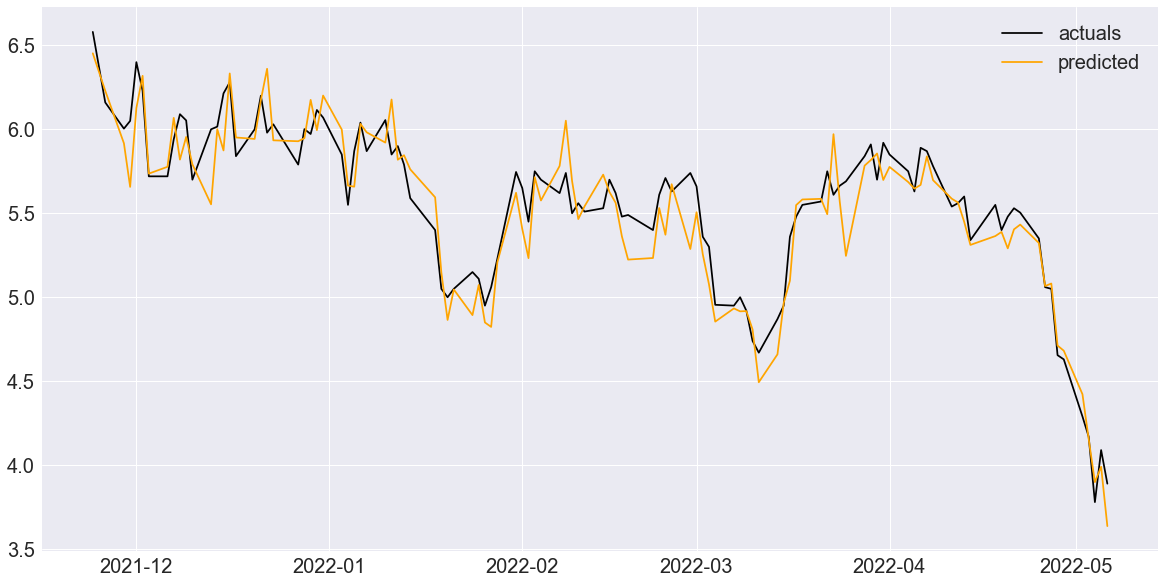

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['trssf_next_close'], color='black')
ax.plot(y_test1['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## TRSSF, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_trssf, df_etfs_dow, on='Date', how='left')
df2

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-03       4.630       4.640      4.240        4.290        177000   
2022-05-04       4.280       4.280      4.020        4.170        396700   
2022-05-05       4.010       4.150      3.750        3.780        530800   
2022-05-06       3.775       4.100      3.420        4.090        408800   
2022-05-09       3.950       4.000      3.750        3.890        212900   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17               NaN             1.478         NaN            NaN   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-03             4.630             4.170      -0.340      -0.073434   
2022-05-04             4.290             3.780      -0.120      -0.027972   
2022-05-05             4.170             4.090      -0.390      -0.093525   
2022-05-06             3.780             3.890       0.310       0.082011   
2022-05-09             4.090               NaN      -0.200      -0.048900   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                   NaN                  NaN                    NaN   
2017-11-20                   NaN                  NaN                    NaN   
2017-11-21                   NaN                  NaN                    NaN   
2017-11-22                   NaN                  NaN                    NaN   
2017-11-24                1.4506                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                4.7370               -0.212                 5.0949   
2022-05-04                4.5590               -0.178                 4.9719   
2022-05-05                4.3050               -0.254                 4.8019   
2022-05-06                4.1920               -0.113                 4.6579   
2022-05-09                4.0440               -0.148                 4.4965   

            trssf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2017-11-17                   NaN  29.889999  29.889999  29.629999  29.761000   
2017-11-20                   NaN  29.980000  29.980000  29.532000  29.600000   
2017-11-21                   NaN  29.500000  29.701000  29.440001  29.540001   
2017-11-22                   NaN  29.639999  29.639999  29.226000  29.549000   
2017-11-24                   NaN  29.879999  29.879999  29.650000  29.732000   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.1260   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.1230   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.1700   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.1440   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [71]:
df_isna2 = df2.isna()
df_isna2

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       False       False      False        False         False   
2017-11-20       False       False      False        False         False   
2017-11-21       False       False      False        False         False   
2017-11-22       False       False      False        False         False   
2017-11-24       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17              True             False        True           True   
2017-11-20             False             False       False          False   
2017-11-21             False             False       False          False   
2017-11-22             False             False       False          False   
2017-11-24             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                  True                 True                   True   
2017-11-20                  True                 True                   True   
2017-11-21                  True                 True                   True   
2017-11-22                  True                 True                   True   
2017-11-24                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            trssf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2017-11-17                  True    False    False   False     False   
2017-11-20                  True    False    False   False     False   
2017-11-21                  True    False    False   False     False   
2017-11-22                  True    False    False   False     False   
2017-11-24                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-03                 False    False    False   False     False   
2022-05-04                 False    False    False   False     False   
2022-05-05                 False    False    False   False     False   
2022-05-06                 False    False    False   False     False   
2022-05-09                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17             0.000             1.478       0.000       0.000000   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                0.0000                  0.0                    0.0   
2017-11-20                0.0000                  0.0                    0.0   
2017-11-21                0.0000                  0.0                    0.0   
2017-11-22                0.0000                  0.0                    0.0   
2017-11-24                1.4506                  0.0                    0.0   

            trssf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2017-11-17                   0.0  29.889999  29.889999  29.629999  29.761000   
2017-11-20                   0.0  29.980000  29.980000  29.532000  29.600000   
2017-11-21                   0.0  29.500000  29.701000  29.440001  29.540001   
2017-11-22                   0.0  29.639999  29.639999  29.226000  29.549000   
2017-11-24                   0.0  29.879999  29.879999  29.650000  29.732000   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2017-11-17       5000      29.430000      29.600000  0.331000    0.011247   
2017-11-20       8400      29.761000      29.540001 -0.161000   -0.005410   
2017-11-21       5300      29.600000      29.549000 -0.059999   -0.002027   
2017-11-22       5000      29.540001      29.732000  0.008999    0.000305   
2017-11-24       4600      29.549000      29.730000  0.183000    0.006193   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2017-11-17            29.3630            0.0022             29.7103   
2017-11-20            29.3838            0.0208             29.6483   
2017-11-21            29.4618            0.0780             29.5925   
2017-11-22            29.5760            0.1142             29.5274   
2017-11-24            29.6364            0.0604             29.4986   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2017-11-17            -0.0459        0.0        0.0       0.0         0.0   
2017-11-20            -0.0620        0.0        0.0       0.0         0.0   
2017-11-21            -0.0558        0.0        0.0       0.0         0.0   
2017-11-22            -0.0651        0.0        0.0       0.0         0.0   
2017-11-24            -0.0288        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2017-11-17          0.0              0.0              0.0        0.0   
2017-11-20          0.0

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

trssf_Open  trssf_High  trssf_Low  trssf_Close  trssf_Volume  \
Date                                                                       
2017-11-17       1.592       1.592      1.495        1.565         91400   
2017-11-20       1.562       1.562      1.396        1.478        287000   
2017-11-21       1.451       1.478      1.379        1.379        230900   
2017-11-22       1.350       1.430      1.338        1.410        211800   
2017-11-24       1.460       1.460      1.421        1.421         26000   
...                ...         ...        ...          ...           ...   
2022-05-03       4.630       4.640      4.240        4.290        177000   
2022-05-04       4.280       4.280      4.020        4.170        396700   
2022-05-05       4.010       4.150      3.750        3.780        530800   
2022-05-06       3.775       4.100      3.420        4.090        408800   
2022-05-09       3.950       4.000      3.750        3.890        212900   

            trssf_prev_close  trssf_next_close  trssf_diff  trssf_%change  \
Date                                                                        
2017-11-17             0.000             1.478       0.000       0.000000   
2017-11-20             1.565             1.379      -0.087      -0.055591   
2017-11-21             1.478             1.410      -0.099      -0.066982   
2017-11-22             1.379             1.421       0.031       0.022480   
2017-11-24             1.410             1.342       0.011       0.007801   
...                      ...               ...         ...            ...   
2022-05-03             4.630             4.170      -0.340      -0.073434   
2022-05-04             4.290             3.780      -0.120      -0.027972   
2022-05-05             4.170             4.090      -0.390      -0.093525   
2022-05-06             3.780             3.890       0.310       0.082011   
2022-05-09             4.090             0.000      -0.200      -0.048900   

            trssf_5day_avg_close  trssf_5day_avg_diff  trssf_10day_avg_close  \
Date                                                                           
2017-11-17                0.0000                0.000                 0.0000   
2017-11-20                0.0000                0.000                 0.0000   
2017-11-21                0.0000                0.000                 0.0000   
2017-11-22                0.0000                0.000                 0.0000   
2017-11-24                1.4506                0.000                 0.0000   
...                          ...                  ...                    ...   
2022-05-03                4.7370               -0.212                 5.0949   
2022-05-04                4.5590               -0.178                 4.9719   
2022-05-05                4.3050               -0.254                 4.8019   
2022-05-06                4.1920               -0.113                 4.6579   
2022-05-09                4.0440               -0.148                 4.4965   

            trssf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2017-11-17                0.0000  29.889999  29.889999  29.629999  29.761000   
2017-11-20                0.0000  29.980000  29.980000  29.532000  29.600000   
2017-11-21                0.0000  29.500000  29.701000  29.440001  29.540001   
2017-11-22                0.0000  29.639999  29.639999  29.226000  29.549000   
2017-11-24                0.0000  29.879999  29.879999  29.650000  29.732000   
...                          ...        ...        ...        ...        ...   
2022-05-03               -0.1260   8.340000   8.470000   8.240000   8.320000   
2022-05-04               -0.1230   8.340000   8.590000   8.100000   8.590000   
2022-05-05               -0.1700   8.500000   8.508000   8.010000   8.050000   
2022-05-06               -0.1440   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'trssf_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2017-11-17     11   17  2017        4       1.592       1.592      1.495   
2017-11-20     11   20  2017        4       1.562       1.562      1.396   
2017-11-21     11   21  2017        4       1.451       1.478      1.379   
2017-11-22     11   22  2017        4       1.350       1.430      1.338   
2017-11-24     11   24  2017        4       1.460       1.460      1.421   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-03      5    3  2022        2       4.630       4.640      4.240   
2022-05-04      5    4  2022        2       4.280       4.280      4.020   
2022-05-05      5    5  2022        2       4.010       4.150      3.750   
2022-05-06      5    6  2022        2       3.775       4.100      3.420   
2022-05-09      5    9  2022        2       3.950       4.000      3.750   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_next_close  \
Date                                                                        
2017-11-17        1.565         91400             0.000             1.478   
2017-11-20        1.478        287000             1.565             1.379   
2017-11-21        1.379        230900             1.478             1.410   
2017-11-22        1.410        211800             1.379             1.421   
2017-11-24        1.421         26000             1.410             1.342   
...                 ...           ...               ...               ...   
2022-05-03        4.290        177000             4.630             4.170   
2022-05-04        4.170        396700             4.290             3.780   
2022-05-05        3.780        530800             4.170             4.090   
2022-05-06        4.090        408800             3.780             3.890   
2022-05-09        3.890        212900             4.090             0.000   

            trssf_diff  trssf_%change  trssf_5day_avg_close  \
Date                                                          
2017-11-17       0.000       0.000000                0.0000   
2017-11-20      -0.087      -0.055591                0.0000   
2017-11-21      -0.099      -0.066982                0.0000   
2017-11-22       0.031       0.022480                0.0000   
2017-11-24       0.011       0.007801                1.4506   
...                ...            ...                   ...   
2022-05-03      -0.340      -0.073434                4.7370   
2022-05-04      -0.120      -0.027972                4.5590   
2022-05-05      -0.390      -0.093525                4.3050   
2022-05-06       0.310       0.082011                4.1920   
2022-05-09      -0.200      -0.048900                4.0440   

            trssf_5day_avg_diff  trssf_10day_avg_close  trssf_10day_avg_diff  \
Date                                                                           
2017-11-17                0.000                 0.0000                0.0000   
2017-11-20                0.000                 0.0000                0.0000   
2017-11-21                0.000                 0.0000                0.0000   
2017-11-22                0.000                 0.0000                0.0000   
2017-11-24                0.000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-03               -0.212                 5.0949               -0.1260   
2022-05-04               -0.178                 4.9719               -0.1230   
2022-05-05               -0.254                 4.8019               -0.1700   
2022-05-06               -0.113                 4.6579               -0.1440   
2022-05-09               -0.148                 4.4965               -0.1614   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2017-11-17  29.889999 

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

1011

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

1011
113


In [82]:
X_train2 = train2.drop('trssf_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2017-11-17     11   17  2017        4       1.592       1.592      1.495   
2017-11-20     11   20  2017        4       1.562       1.562      1.396   
2017-11-21     11   21  2017        4       1.451       1.478      1.379   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_diff  \
Date                                                                  
2017-11-17        1.565         91400             0.000       0.000   
2017-11-20        1.478        287000             1.565      -0.087   
2017-11-21        1.379        230900             1.478      -0.099   

            trssf_%change  trssf_5day_avg_close  trssf_5day_avg_diff  \
Date                                                                   
2017-11-17       0.000000                   0.0                  0.0   
2017-11-20      -0.055591                   0.0                  0.0   
2017-11-21      -0.066982                   0.0                  0.0   

            trssf_10day_avg_close  trssf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2017-11-17                    0.0                   0.0  29.889999  29.889999   
2017-11-20                    0.0                   0.0  29.980000  29.980000   
2017-11-21                    0.0                   0.0  29.500000  29.701000   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2017-11-17  29.629999  29.761000       5000         29.430      29.600000   
2017-11-20  29.532000  29.600000       8400         29.761      29.540001   
2017-11-21  29.440001  29.540001       5300         29.600      29.549000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2017-11-17  0.331000    0.011247            29.3630            0.0022   
2017-11-20 -0.161000   -0.005410            29.3838            0.0208   
2017-11-21 -0.059999   -0.002027            29.4618            0.0780   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2017-11-17             29.7103            -0.0459        0.0        0.0   
2017-11-20             29.6483            -0.0620        0.0        0.0   
2017-11-21             29.5925            -0.0558        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2017-11-17       0.0         0.0          0.0              0.0   
2017-11-20       0.0         0.0          0.0              0.0   
2017-11-21       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2017-11-17              0.0        0.0           0.0                  0.0   
2017-11-20              0.0        0.0           0.0                  0.0   
2017-11-21              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2017-11-17                 0.0                   0.0                  0.0   
2017-11-20                 0.0                   0.0                  0.0   
2017-11-21                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2017-11-17        0.0        0.0       0.0         0.0          0.0   
2017-11-20        0.0        0.0       0.0         0.0          

In [83]:
X_train2.shape

(1011, 185)

In [84]:
y_train2 = train2['trssf_next_close']
y_train2.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-11-19    5.550
2021-11-22    6.055
2021-11-23    6.510
Name: trssf_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('trssf_next_close', axis=1)
y_test2 = test2['trssf_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  trssf_Open  trssf_High  trssf_Low  \
Date                                                                       
2021-11-24     11   24  2021        4        6.05       6.630       5.84   
2021-11-26     11   26  2021        4        6.05       6.700       6.05   
2021-11-29     11   29  2021        4        6.26       6.618       6.15   

            trssf_Close  trssf_Volume  trssf_prev_close  trssf_diff  \
Date                                                                  
2021-11-24         6.51        440700             6.055       0.455   
2021-11-26         6.58        123400             6.510       0.070   
2021-11-29         6.16        210300             6.580      -0.420   

            trssf_%change  trssf_5day_avg_close  trssf_5day_avg_diff  \
Date                                                                   
2021-11-24       0.075145                 5.987                0.082   
2021-11-26       0.010753                 6.085                0.098   
2021-11-29      -0.063830                 6.171                0.086   

            trssf_10day_avg_close  trssf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2021-11-24                 6.1333                0.0740    12.73    13.08   
2021-11-26                 6.1935                0.0602    12.57    12.73   
2021-11-29                 6.1115               -0.0820    12.74    12.74   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2021-11-24   12.59     13.01     756300          12.81          12.68   
2021-11-26   12.45     12.68     895400          13.01          12.27   
2021-11-29   12.19     12.27    1294300          12.68          12.06   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2021-11-24     0.20    0.015613             13.006            -0.240   
2021-11-26    -0.33   -0.025365             12.886            -0.120   
2021-11-29    -0.41   -0.032334             12.712            -0.174   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-11-24              13.915             -0.120  27.920000  28.959999   
2021-11-26              13.730             -0.185  27.870001  28.799999   
2021-11-29              13.419             -0.311  28.490000  28.670000   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2021-11-24     27.73   28.670000    1672800.0        28.100000   
2021-11-26     27.50   28.530001    1119800.0        28.670000   
2021-11-29     27.25   27.379999    1385000.0        28.530001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-11-24        28.530001   0.570000      0.020285               28.320   
2021-11-26        27.379999  -0.139999     -0.004883               28.220   
2021-11-29        26.520000  -1.150002     -0.040309               27.992   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-11-24              -0.230                29.507               -0.007   
2021-11-26              -0.100                29.338               -0.169   
2021-11-29              -0.228                28.868               -0.470   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2021-11-24      15.00     15.599     14.83       15.56      87500.0   
2021-11-26      15.19     15.350     14.83       15.27     141200.0   
2021-11-29      15.31     15.540     1

In [88]:
X_test2.shape

(113, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-04    3.78
2022-05-05    4.09
2022-05-06    3.89
Name: trssf_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([6.45763962, 6.13678606, 5.93997206, 5.64229402, 6.08513104])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.1922179925631235


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.1524622299645638


In [94]:
hyper_table.append(dict(version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

In [95]:
y_train2 = pd.DataFrame(y_train2, columns=['trssf_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['trssf_next_close'])

In [96]:
y_test2['trssf_pred_next_close'] = y_pred2

In [97]:
y_test2.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-02              4.29               4.419006
2022-05-03              4.17               4.110407
2022-05-04              3.78               3.861653
2022-05-05              4.09               3.920722
2022-05-06              3.89               3.583736

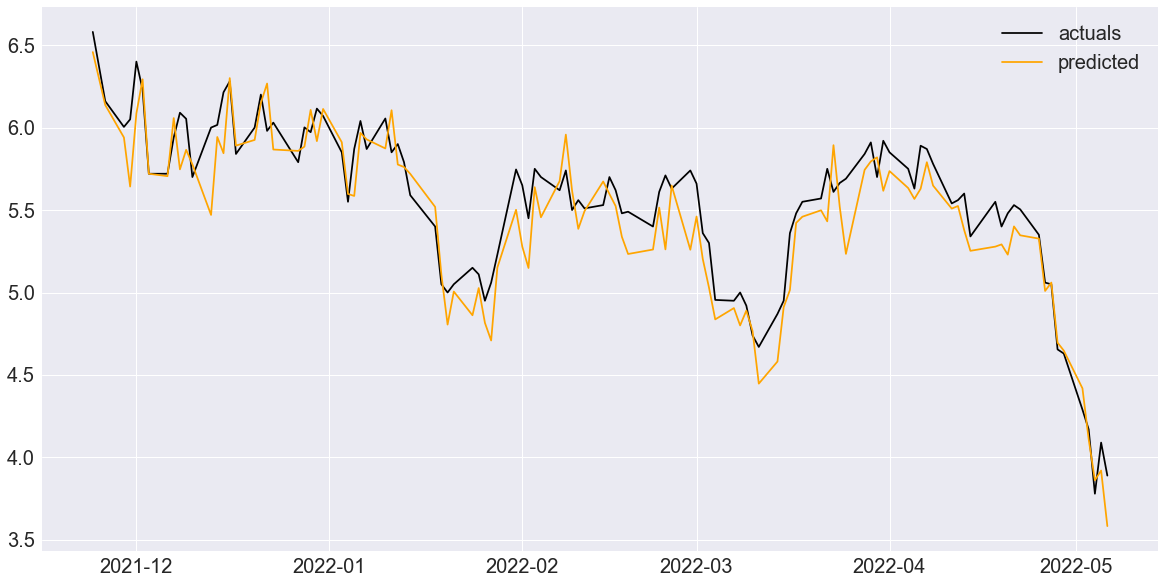

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['trssf_next_close'], color='black')
ax.plot(y_test2['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TRSSF target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   
2017-11-22     11   22  2017        4    14.450    15.290   14.400     15.241   
2017-11-24     11   24  2017        4    15.130    15.130   14.846     15.020   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   
2017-11-22      993600          14.365          15.020     0.876     0.060982   
2017-11-24      499900          15.241          15.440    -0.221    -0.014500   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   
2017-11-22             14.4190             0.1552              14.9301   
2017-11-24             14.7190             0.3000              14.9061   
...                        ...                ...                  ...   
2022-05-03              5.7000             0.1520               5.6420   
2022-05-04              5.9880             0.2880               5.7360   
2022-05-05              6.1120             0.1240               5.7680   
2022-05-06              6.1640             0.0520               5.8080   
2022-05-09              6.0640            -0.1000               5.8060   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179        0.00       0.000       0.00   
2017-11-20             -0.0731        0.00       0.000       0.00   
2017-11-21             -0.1117        0.00       0.000       0.00   
2017-11-22             -0.0219        0.00       0.000       0.00   
2017-11-24             -0.0240        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03              0.0130        4.50       4.750       4.20   
2022-05-04              0.0940        4.22       4.414       4.05   
2022-05-05              0.0320        4.20       4.250       4.02   
2022-05-06              0.0400        3.92       4.340       3.82   
2022-05-09             -0.0020        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

1011

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

1011
113


In [112]:
X_train3 = train3.drop('trssf_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179         0.0         0.0        0.0   
2017-11-20             -0.0731         0.0         0.0        0.0   
2017-11-21             -0.1117         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2017-11-17          0.0           0.0               0.0               0.0   
2017-11-20          0.0           0.0               0.0               0.0   
2017-11-21          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2017-11-17         0.0            0.0                   0.0   
2017-11-20         0.0            0.0                   0.0   
2017-11-21         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2017-11-17                  0.0                    0.0                   0.0   
2017-11-20                  0.0                    0.0                   0.0   
2017-11-21                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2017-11-17        0.0        0.0       0.0         0.0          0.0   
2017-11-20        0.0        0.0       0.0         0.0          0.0   
2017-11-21        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2017-11-17              0.0              0.0        0.0           0.0   
2017-11-20              0.0              0.0        0.0           0.0   
2017-11-21              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2017-11-17                  0.0                 0.0                   0.0   
2017-11-20                  0.0                 0.0                   0.0   
2017-11-21                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2017-11-17                  0.0         0.0         0.0        0.0   
2017-11-20                  0.0         0.0         0.0       

In [113]:
X_train3.shape

(1011, 263)

In [114]:
y_train3 = train3['trssf_next_close']
y_train3.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-11-19    5.550
2021-11-22    6.055
2021-11-23    6.510
Name: trssf_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('trssf_next_close', axis=1)
y_test3 = test3['trssf_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-11-24     11   24  2021        4    11.520     12.06    11.29      11.87   
2021-11-26     11   26  2021        4    11.460     11.77    11.34      11.69   
2021-11-29     11   29  2021        4    11.757     11.80    10.97      11.06   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-11-24     5517100           11.62           11.69      0.25     0.021515   
2021-11-26     3453500           11.87           11.06     -0.18    -0.015164   
2021-11-29     7848200           11.69           10.71     -0.63    -0.053892   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-11-24              11.934             -0.346               13.089   
2021-11-26              11.802             -0.132               12.906   
2021-11-29              11.578             -0.224               12.485   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-11-24              -0.125        8.90       9.160      8.591   
2021-11-26              -0.183        8.20       9.055      8.200   
2021-11-29              -0.421        8.57       9.070      8.350   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-11-24        8.820      364500.0             8.795             8.928   
2021-11-26        8.928      250700.0             8.820             8.400   
2021-11-29        8.400      522700.0             8.928             8.170   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-11-24       0.025       0.002843                8.7630   
2021-11-26       0.108       0.012245                8.7066   
2021-11-29      -0.528      -0.059140                8.6306   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-11-24              -0.0668                 8.9829                0.0057   
2021-11-26              -0.0564                 8.9837                0.0008   
2021-11-29              -0.0760                 8.8577               -0.1260   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-11-24      4.670      4.910      4.57        4.81    2379600.0   
2021-11-26      4.560      4.740      4.56        4.67    1947200.0   
2021-11-29      4.698      4.698      4.38        4.46    3633100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-11-24             4.68             4.67       0.13      0.027778   
2021-11-26             4.81             4.46      -0.14     -0.029106   
2021-11-29             4.67             4.53      -0.21     -0.044968   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-11-24                4.800              -0.148                 5.324   
2021-11-26                4.756              -0.044                 5.223   
2021-11-29                4.662              -0.094                 5.043   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-11-24               -0.066      10.000       10.36      9.701   
2021-11-26               -0.101       9.305       10.14      9

In [118]:
X_test3.shape

(113, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-04    3.78
2022-05-05    4.09
2022-05-06    3.89
Name: trssf_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([6.38908196, 6.34225532, 5.79524804, 5.75335139, 6.02003462])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.222149803831536


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.1831436061145634


In [124]:
hyper_table.append(dict(version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

In [125]:
y_train3 = pd.DataFrame(y_train3, columns=['trssf_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['trssf_next_close'])

In [126]:
y_test3['trssf_pred_next_close'] = y_pred3

In [127]:
y_test3.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-02              4.29               4.289907
2022-05-03              4.17               4.004890
2022-05-04              3.78               3.869165
2022-05-05              4.09               3.721457
2022-05-06              3.89               3.481160

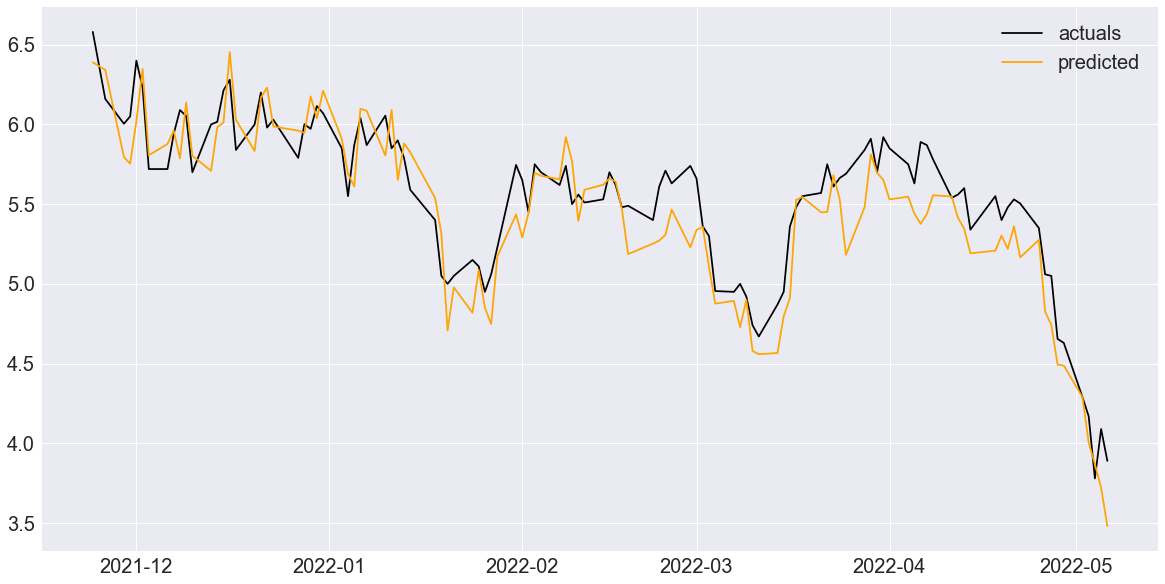

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['trssf_next_close'], color='black')
ax.plot(y_test3['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TRSSF target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   
2017-11-22     11   22  2017        4    14.450    15.290   14.400     15.241   
2017-11-24     11   24  2017        4    15.130    15.130   14.846     15.020   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   
2017-11-22      993600          14.365          15.020     0.876     0.060982   
2017-11-24      499900          15.241          15.440    -0.221    -0.014500   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   
2017-11-22             14.4190             0.1552              14.9301   
2017-11-24             14.7190             0.3000              14.9061   
...                        ...                ...                  ...   
2022-05-03              5.7000             0.1520               5.6420   
2022-05-04              5.9880             0.2880               5.7360   
2022-05-05              6.1120             0.1240               5.7680   
2022-05-06              6.1640             0.0520               5.8080   
2022-05-09              6.0640            -0.1000               5.8060   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179        0.00       0.000       0.00   
2017-11-20             -0.0731        0.00       0.000       0.00   
2017-11-21             -0.1117        0.00       0.000       0.00   
2017-11-22             -0.0219        0.00       0.000       0.00   
2017-11-24             -0.0240        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03              0.0130        4.50       4.750       4.20   
2022-05-04              0.0940        4.22       4.414       4.05   
2022-05-05              0.0320        4.20       4.250       4.02   
2022-05-06              0.0400        3.92       4.340       3.82   
2022-05-09             -0.0020        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

1011

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

1011
113


In [142]:
X_train4 = train4.drop('trssf_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179         0.0         0.0        0.0   
2017-11-20             -0.0731         0.0         0.0        0.0   
2017-11-21             -0.1117         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2017-11-17          0.0           0.0               0.0               0.0   
2017-11-20          0.0           0.0               0.0               0.0   
2017-11-21          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2017-11-17         0.0            0.0                   0.0   
2017-11-20         0.0            0.0                   0.0   
2017-11-21         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2017-11-17                  0.0                    0.0                   0.0   
2017-11-20                  0.0                    0.0                   0.0   
2017-11-21                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2017-11-17        0.0        0.0       0.0         0.0          0.0   
2017-11-20        0.0        0.0       0.0         0.0          0.0   
2017-11-21        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2017-11-17              0.0              0.0        0.0           0.0   
2017-11-20              0.0              0.0        0.0           0.0   
2017-11-21              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2017-11-17                  0.0                 0.0                   0.0   
2017-11-20                  0.0                 0.0                   0.0   
2017-11-21                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2017-11-17                  0.0         0.0         0.0        0.0   
2017-11-20                  0.0         0.0         0.0       

In [143]:
X_train4.shape

(1011, 289)

In [144]:
y_train4 = train4['trssf_next_close']
y_train4.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-11-19    5.550
2021-11-22    6.055
2021-11-23    6.510
Name: trssf_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('trssf_next_close', axis=1)
y_test4 = test4['trssf_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-11-24     11   24  2021        4    11.520     12.06    11.29      11.87   
2021-11-26     11   26  2021        4    11.460     11.77    11.34      11.69   
2021-11-29     11   29  2021        4    11.757     11.80    10.97      11.06   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-11-24     5517100           11.62           11.69      0.25     0.021515   
2021-11-26     3453500           11.87           11.06     -0.18    -0.015164   
2021-11-29     7848200           11.69           10.71     -0.63    -0.053892   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-11-24              11.934             -0.346               13.089   
2021-11-26              11.802             -0.132               12.906   
2021-11-29              11.578             -0.224               12.485   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-11-24              -0.125        8.90       9.160      8.591   
2021-11-26              -0.183        8.20       9.055      8.200   
2021-11-29              -0.421        8.57       9.070      8.350   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-11-24        8.820      364500.0             8.795             8.928   
2021-11-26        8.928      250700.0             8.820             8.400   
2021-11-29        8.400      522700.0             8.928             8.170   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-11-24       0.025       0.002843                8.7630   
2021-11-26       0.108       0.012245                8.7066   
2021-11-29      -0.528      -0.059140                8.6306   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-11-24              -0.0668                 8.9829                0.0057   
2021-11-26              -0.0564                 8.9837                0.0008   
2021-11-29              -0.0760                 8.8577               -0.1260   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-11-24      4.670      4.910      4.57        4.81    2379600.0   
2021-11-26      4.560      4.740      4.56        4.67    1947200.0   
2021-11-29      4.698      4.698      4.38        4.46    3633100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-11-24             4.68             4.67       0.13      0.027778   
2021-11-26             4.81             4.46      -0.14     -0.029106   
2021-11-29             4.67             4.53      -0.21     -0.044968   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-11-24                4.800              -0.148                 5.324   
2021-11-26                4.756              -0.044                 5.223   
2021-11-29                4.662              -0.094                 5.043   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-11-24               -0.066      10.000       10.36      9.701   
2021-11-26               -0.101       9.305       10.14      9

In [148]:
X_test4.shape

(113, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-04    3.78
2022-05-05    4.09
2022-05-06    3.89
Name: trssf_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([6.41239423, 6.33657108, 5.7563581 , 5.74909103, 6.02019371])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.20942421878379436


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.17173168008674006


In [154]:
hyper_table.append(dict(version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

In [155]:
y_train4 = pd.DataFrame(y_train4, columns=['trssf_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['trssf_next_close'])

In [156]:
y_test4['trssf_pred_next_close'] = y_pred4

In [157]:
y_test4.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-02              4.29               4.381988
2022-05-03              4.17               4.023370
2022-05-04              3.78               3.930686
2022-05-05              4.09               3.825110
2022-05-06              3.89               3.502312

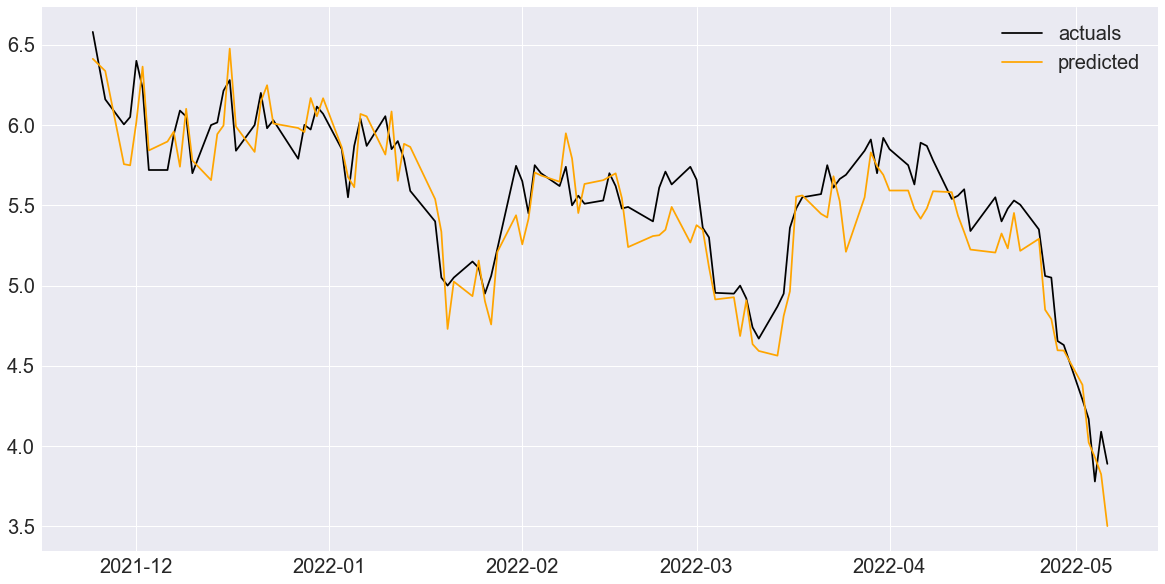

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['trssf_next_close'], color='black')
ax.plot(y_test4['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TRSSF target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   
2017-11-22     11   22  2017        4    14.450    15.290   14.400     15.241   
2017-11-24     11   24  2017        4    15.130    15.130   14.846     15.020   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   
2017-11-22      993600          14.365          15.020     0.876     0.060982   
2017-11-24      499900          15.241          15.440    -0.221    -0.014500   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   
2017-11-22             14.4190             0.1552              14.9301   
2017-11-24             14.7190             0.3000              14.9061   
...                        ...                ...                  ...   
2022-05-03              5.7000             0.1520               5.6420   
2022-05-04              5.9880             0.2880               5.7360   
2022-05-05              6.1120             0.1240               5.7680   
2022-05-06              6.1640             0.0520               5.8080   
2022-05-09              6.0640            -0.1000               5.8060   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179        0.00       0.000       0.00   
2017-11-20             -0.0731        0.00       0.000       0.00   
2017-11-21             -0.1117        0.00       0.000       0.00   
2017-11-22             -0.0219        0.00       0.000       0.00   
2017-11-24             -0.0240        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03              0.0130        4.50       4.750       4.20   
2022-05-04              0.0940        4.22       4.414       4.05   
2022-05-05              0.0320        4.20       4.250       4.02   
2022-05-06              0.0400        3.92       4.340       3.82   
2022-05-09             -0.0020        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

1011

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

1011
113


In [172]:
X_train5 = train5.drop('trssf_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179         0.0         0.0        0.0   
2017-11-20             -0.0731         0.0         0.0        0.0   
2017-11-21             -0.1117         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2017-11-17          0.0           0.0               0.0               0.0   
2017-11-20          0.0           0.0               0.0               0.0   
2017-11-21          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2017-11-17         0.0            0.0                   0.0   
2017-11-20         0.0            0.0                   0.0   
2017-11-21         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2017-11-17                  0.0                    0.0                   0.0   
2017-11-20                  0.0                    0.0                   0.0   
2017-11-21                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2017-11-17        0.0        0.0       0.0         0.0          0.0   
2017-11-20        0.0        0.0       0.0         0.0          0.0   
2017-11-21        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2017-11-17              0.0              0.0        0.0           0.0   
2017-11-20              0.0              0.0        0.0           0.0   
2017-11-21              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2017-11-17                  0.0                 0.0                   0.0   
2017-11-20                  0.0                 0.0                   0.0   
2017-11-21                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2017-11-17                  0.0         0.0         0.0        0.0   
2017-11-20                  0.0         0.0         0.0       

In [173]:
X_train5.shape

(1011, 393)

In [174]:
y_train5 = train5['trssf_next_close']
y_train5.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-11-19    5.550
2021-11-22    6.055
2021-11-23    6.510
Name: trssf_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('trssf_next_close', axis=1)
y_test5 = test5['trssf_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-11-24     11   24  2021        4    11.520     12.06    11.29      11.87   
2021-11-26     11   26  2021        4    11.460     11.77    11.34      11.69   
2021-11-29     11   29  2021        4    11.757     11.80    10.97      11.06   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-11-24     5517100           11.62           11.69      0.25     0.021515   
2021-11-26     3453500           11.87           11.06     -0.18    -0.015164   
2021-11-29     7848200           11.69           10.71     -0.63    -0.053892   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-11-24              11.934             -0.346               13.089   
2021-11-26              11.802             -0.132               12.906   
2021-11-29              11.578             -0.224               12.485   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-11-24              -0.125        8.90       9.160      8.591   
2021-11-26              -0.183        8.20       9.055      8.200   
2021-11-29              -0.421        8.57       9.070      8.350   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-11-24        8.820      364500.0             8.795             8.928   
2021-11-26        8.928      250700.0             8.820             8.400   
2021-11-29        8.400      522700.0             8.928             8.170   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-11-24       0.025       0.002843                8.7630   
2021-11-26       0.108       0.012245                8.7066   
2021-11-29      -0.528      -0.059140                8.6306   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-11-24              -0.0668                 8.9829                0.0057   
2021-11-26              -0.0564                 8.9837                0.0008   
2021-11-29              -0.0760                 8.8577               -0.1260   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-11-24      4.670      4.910      4.57        4.81    2379600.0   
2021-11-26      4.560      4.740      4.56        4.67    1947200.0   
2021-11-29      4.698      4.698      4.38        4.46    3633100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-11-24             4.68             4.67       0.13      0.027778   
2021-11-26             4.81             4.46      -0.14     -0.029106   
2021-11-29             4.67             4.53      -0.21     -0.044968   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-11-24                4.800              -0.148                 5.324   
2021-11-26                4.756              -0.044                 5.223   
2021-11-29                4.662              -0.094                 5.043   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-11-24               -0.066      10.000       10.36      9.701   
2021-11-26               -0.101       9.305       10.14      9

In [178]:
X_test5.shape

(113, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-04    3.78
2022-05-05    4.09
2022-05-06    3.89
Name: trssf_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([6.35705958, 6.26268312, 5.77985864, 5.76696624, 5.94450284])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.22431269370506154


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.1870387243017864


In [184]:
hyper_table.append(dict(version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

In [185]:
y_train5 = pd.DataFrame(y_train5, columns=['trssf_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['trssf_next_close'])

In [186]:
y_test5['trssf_pred_next_close'] = y_pred5

In [187]:
y_test5.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-02              4.29               4.347193
2022-05-03              4.17               3.987456
2022-05-04              3.78               3.909799
2022-05-05              4.09               3.804825
2022-05-06              3.89               3.572285

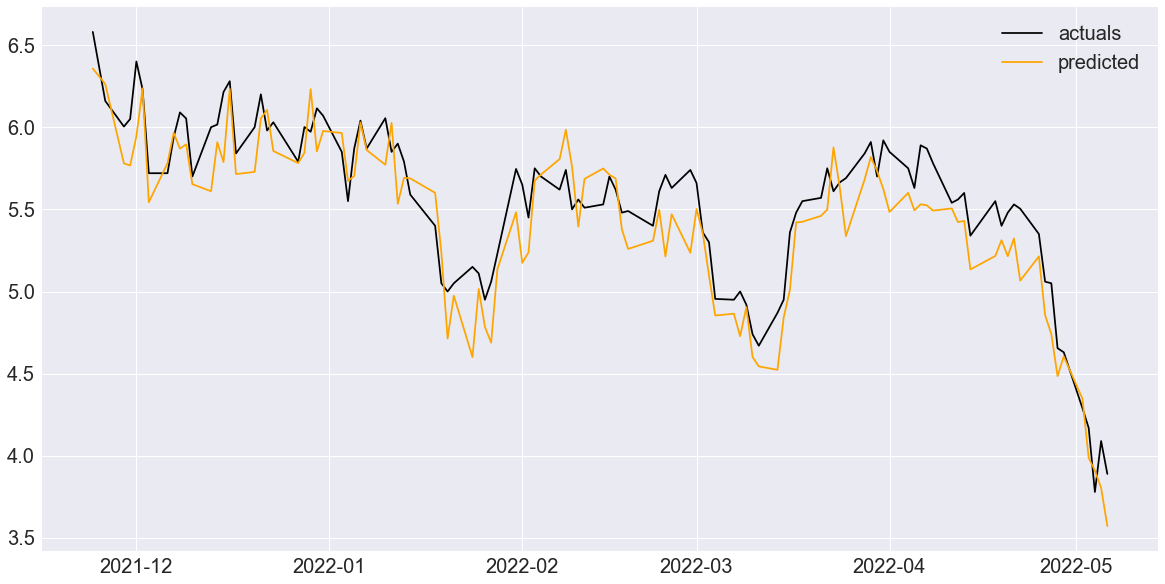

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['trssf_next_close'], color='black')
ax.plot(y_test5['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TRSSF target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   
2017-11-22     11   22  2017        4    14.450    15.290   14.400     15.241   
2017-11-24     11   24  2017        4    15.130    15.130   14.846     15.020   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   
2017-11-22      993600          14.365          15.020     0.876     0.060982   
2017-11-24      499900          15.241          15.440    -0.221    -0.014500   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   
2017-11-22             14.4190             0.1552              14.9301   
2017-11-24             14.7190             0.3000              14.9061   
...                        ...                ...                  ...   
2022-05-03              5.7000             0.1520               5.6420   
2022-05-04              5.9880             0.2880               5.7360   
2022-05-05              6.1120             0.1240               5.7680   
2022-05-06              6.1640             0.0520               5.8080   
2022-05-09              6.0640            -0.1000               5.8060   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179        0.00       0.000       0.00   
2017-11-20             -0.0731        0.00       0.000       0.00   
2017-11-21             -0.1117        0.00       0.000       0.00   
2017-11-22             -0.0219        0.00       0.000       0.00   
2017-11-24             -0.0240        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03              0.0130        4.50       4.750       4.20   
2022-05-04              0.0940        4.22       4.414       4.05   
2022-05-05              0.0320        4.20       4.250       4.02   
2022-05-06              0.0400        3.92       4.340       3.82   
2022-05-09             -0.0020        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

1011

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

1011
113


In [202]:
X_train6 = train6.drop('trssf_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2017-11-17     11   17  2017        4    13.325    14.874   13.060     14.450   
2017-11-20     11   20  2017        4    14.795    15.070   14.343     14.519   
2017-11-21     11   21  2017        4    14.600    14.670   14.150     14.365   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2017-11-17     1639400          13.520          14.519     0.930     0.068787   
2017-11-20      969100          14.450          14.365     0.069     0.004775   
2017-11-21      650800          14.519          15.241    -0.154    -0.010607   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2017-11-17             14.8238            -0.2694              15.1368   
2017-11-20             14.5288            -0.2950              15.0637   
2017-11-21             14.2638            -0.2650              14.9520   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2017-11-17              0.1179         0.0         0.0        0.0   
2017-11-20             -0.0731         0.0         0.0        0.0   
2017-11-21             -0.1117         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2017-11-17          0.0           0.0               0.0               0.0   
2017-11-20          0.0           0.0               0.0               0.0   
2017-11-21          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2017-11-17         0.0            0.0                   0.0   
2017-11-20         0.0            0.0                   0.0   
2017-11-21         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2017-11-17                  0.0                    0.0                   0.0   
2017-11-20                  0.0                    0.0                   0.0   
2017-11-21                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2017-11-17        0.0        0.0       0.0         0.0          0.0   
2017-11-20        0.0        0.0       0.0         0.0          0.0   
2017-11-21        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2017-11-17              0.0              0.0        0.0           0.0   
2017-11-20              0.0              0.0        0.0           0.0   
2017-11-21              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2017-11-17                  0.0                 0.0                   0.0   
2017-11-20                  0.0                 0.0                   0.0   
2017-11-21                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2017-11-17                  0.0         0.0         0.0        0.0   
2017-11-20                  0.0         0.0         0.0       

In [203]:
X_train6.shape

(1011, 419)

In [204]:
y_train6 = train6['trssf_next_close']
y_train6.head(3)

Date
2017-11-17    1.478
2017-11-20    1.379
2017-11-21    1.410
Name: trssf_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-11-19    5.550
2021-11-22    6.055
2021-11-23    6.510
Name: trssf_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('trssf_next_close', axis=1)
y_test6 = test6['trssf_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-11-24     11   24  2021        4    11.520     12.06    11.29      11.87   
2021-11-26     11   26  2021        4    11.460     11.77    11.34      11.69   
2021-11-29     11   29  2021        4    11.757     11.80    10.97      11.06   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-11-24     5517100           11.62           11.69      0.25     0.021515   
2021-11-26     3453500           11.87           11.06     -0.18    -0.015164   
2021-11-29     7848200           11.69           10.71     -0.63    -0.053892   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-11-24              11.934             -0.346               13.089   
2021-11-26              11.802             -0.132               12.906   
2021-11-29              11.578             -0.224               12.485   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-11-24              -0.125        8.90       9.160      8.591   
2021-11-26              -0.183        8.20       9.055      8.200   
2021-11-29              -0.421        8.57       9.070      8.350   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-11-24        8.820      364500.0             8.795             8.928   
2021-11-26        8.928      250700.0             8.820             8.400   
2021-11-29        8.400      522700.0             8.928             8.170   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-11-24       0.025       0.002843                8.7630   
2021-11-26       0.108       0.012245                8.7066   
2021-11-29      -0.528      -0.059140                8.6306   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-11-24              -0.0668                 8.9829                0.0057   
2021-11-26              -0.0564                 8.9837                0.0008   
2021-11-29              -0.0760                 8.8577               -0.1260   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-11-24      4.670      4.910      4.57        4.81    2379600.0   
2021-11-26      4.560      4.740      4.56        4.67    1947200.0   
2021-11-29      4.698      4.698      4.38        4.46    3633100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-11-24             4.68             4.67       0.13      0.027778   
2021-11-26             4.81             4.46      -0.14     -0.029106   
2021-11-29             4.67             4.53      -0.21     -0.044968   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-11-24                4.800              -0.148                 5.324   
2021-11-26                4.756              -0.044                 5.223   
2021-11-29                4.662              -0.094                 5.043   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-11-24               -0.066      10.000       10.36      9.701   
2021-11-26               -0.101       9.305       10.14      9

In [208]:
X_test6.shape

(113, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-04    3.78
2022-05-05    4.09
2022-05-06    3.89
Name: trssf_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([6.35199791, 6.22814771, 5.74894739, 5.75985674, 5.93047541])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.23551313044439987


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.19706472209380077


In [214]:
hyper_table.append(dict(version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

In [215]:
y_train6 = pd.DataFrame(y_train6, columns=['trssf_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['trssf_next_close'])

In [216]:
y_test6['trssf_pred_next_close'] = y_pred6

In [217]:
y_test6.tail()

trssf_next_close  trssf_pred_next_close
Date                                               
2022-05-02              4.29               4.336455
2022-05-03              4.17               3.961587
2022-05-04              3.78               3.862789
2022-05-05              4.09               3.739728
2022-05-06              3.89               3.508954

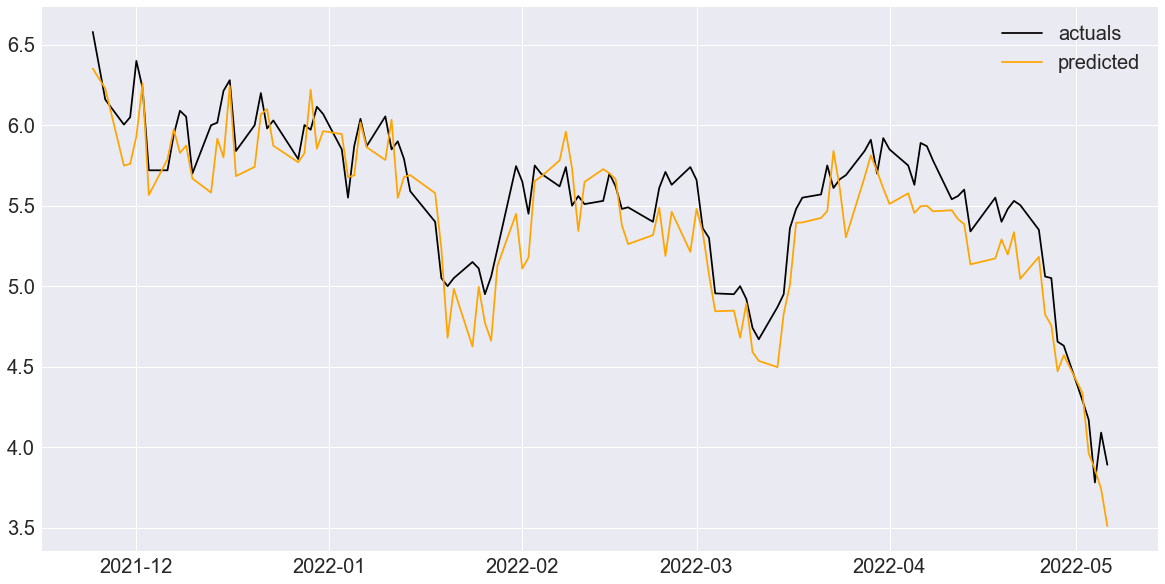

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['trssf_next_close'], color='black')
ax.plot(y_test6['trssf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

version               model      rmse       mae  rows  train_rows  \
1        1+ETFs  LinearRegression()  0.169646  0.132325  1124        1011   
2    1+ETFs+Dow  LinearRegression()  0.192218  0.152462  1124        1011   
0         1+Dow  LinearRegression()  0.203092  0.160776  1124        1011   
4       All+Dow  LinearRegression()  0.209424  0.171732  1124        1011   
3    All stocks  LinearRegression()  0.222150  0.183144  1124        1011   
5      All+ETFs  LinearRegression()  0.224313  0.187039  1124        1011   
6  All+ETFs+Dow  LinearRegression()  0.235513  0.197065  1124        1011   

   test_rows  columns  
1        113      160  
2        113      186  
0        113       56  
4        113      290  
3        113      264  
5        113      394  
6        113      420

In [220]:
# hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table.csv', index=False)